# Xbar_S chart
The data should be organised in the following format

- column 1: sample lables
- column 2 to n: are the samples in one subgroup
- no more columns should be present in the dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('control_chart_data.csv')

In [7]:
def xbar_s_control_chart(data, ylabel = ' '):
    subgroup_size = len(data.columns)-1
    
    # move labels column to index
    data.index = data.iloc[:, 0]
    data = data.drop(data.iloc[:, 0:1], axis=1)
    
    # control chart constants
    control_chart_constants = pd.DataFrame({'n':[  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
                                                 15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25],
                                            'A3':[2.659, 1.954, 1.628, 1.427, 1.287, 1.182, 1.099, 1.032, 0.975,
                                                  0.927, 0.886, 0.85 , 0.817, 0.789, 0.763, 0.739, 0.718, 0.698,
                                                  0.68 , 0.663, 0.647, 0.633, 0.619, 0.606],
                                            'B4':[3.267, 2.568, 2.266, 2.089, 1.97 , 1.882, 1.815, 1.761, 1.716,
                                                  1.679, 1.646, 1.618, 1.594, 1.572, 1.552, 1.534, 1.518, 1.503,
                                                  1.49 , 1.477, 1.466, 1.455, 1.445, 1.435],
                                            'B3': [0.   , 0.   , 0.   , 0.   , 0.03 , 0.118, 0.185, 0.239, 0.284,
                                                  0.321, 0.354, 0.382, 0.406, 0.428, 0.448, 0.466, 0.482, 0.497,
                                                  0.51 , 0.523, 0.534, 0.545, 0.555, 0.565, ]})
    a_three = control_chart_constants['A3'][control_chart_constants['n'] == subgroup_size].values[0]
    b_four = control_chart_constants['B4'][control_chart_constants['n'] == subgroup_size].values[0]
    b_three = control_chart_constants['B3'][control_chart_constants['n'] == subgroup_size].values[0]
    
    # create columns for mean & range
    data['s'] = data.std(axis=1)
    data['mean'] = data.drop('s', axis=1).mean(axis=1)
    
    # S chart statistics

    # Calculate average range
    average_s = data['s'].mean()

    # Calculate the s chart upper control limit.
    s_chart_upper_control_limit = average_s * b_four

    # Calculate the range chart lower control limit.
    s_chart_lower_control_limit = average_s  * b_three

    # Set the moving range lower control limit to 0 if it is < 0.
    if s_chart_lower_control_limit < 0:
        s_chart_lower_control_limit = 0.0
        
    # Xbar chart statistics
    # Calculate average of averages.
    average_of_averages = data['mean'].mean()

    # Calculate the averages chart upper control limit.
    average_chart_upper_control_limit = average_of_averages + (average_s * a_three)

    # Calculate the averages chart lower control limit.
    average_chart_lower_control_limit = average_of_averages - (average_s * a_three)
    
    plt.figure(figsize = (14,4))
    # Create a graph of "average values v. sample".
    ax = data['mean'] .plot.line(legend=False, marker='o', markersize=5, color='black')
    ax.axhline(y=average_of_averages, color='green')
    ax.axhline(y=average_chart_upper_control_limit, ls = '--', color='r')
    ax.axhline(y=average_chart_lower_control_limit, ls = '--', color='r')

    # Add the chart title and subtitle.
    ax.set_title('Xbar Control Chart')
    # Add the Y axis label.
    ax.set_ylabel(ylabel)
    plt.show()


    # Average Control chart statistics
    print('Upper control limit',
          np.round(average_chart_upper_control_limit, 2),
          sep=' = ')
    print('Average',
          np.round(average_of_averages, 2),
          sep=' = ')
    print('Lower control limit',
          np.round(average_chart_lower_control_limit, 2),
          sep=' = ')
    
    # Create a graph of "range values v. sample".
    plt.figure(figsize = (14,4))

    ax = data['s'].plot.line(legend=False, marker='o', markersize=5, color='black')
    ax.axhline(y=average_s, color='green')
    ax.axhline(y=s_chart_upper_control_limit, ls = '--', color='r')
    ax.axhline(y=s_chart_lower_control_limit, ls = '--', color='r')

    # Add the chart title and subtitle.
    ax.set_title('StdDev Control Chart')
    # Add the Y axis label.
    ax.set_ylabel(ylabel + ' StdDev')
    plt.show()

    # Average range chart statistics
    print('Upper control limit',
          s_chart_upper_control_limit.round(2),
          sep=' = ')
    print('Average standard deviation',
          np.round(average_s, 2),
          sep=' = ')
    print('Lower control limit',
          np.round(s_chart_lower_control_limit, 2),
          sep=' = ')


    print('___________________________________________')

    # Warnings

    # Find points outside control limits
    points_over_ucl = data.loc[((data['mean']) > average_chart_upper_control_limit), :]
    points_under_lcl = data.loc[((data['mean']) < average_chart_lower_control_limit), :]
    out_of_control_points = len(points_over_ucl) + len(points_under_lcl)

    total_data_points = len(data)

    print( f'Number of out-of-control points on Xbar chart: {out_of_control_points}')
    print('If the data are correlated, you may see an increased number of false alarms.')

    if total_data_points <100:
        print(""" 
        Warning: You may not have enough data to estimate precise control limits.
        At least 100 data points should be included in the calculations.
        """)

    if (out_of_control_points/total_data_points) > 0.05:
        print(f"""
        Warning: Evaluate the % of out-of-control subgroups  
        ({np.round(out_of_control_points/total_data_points, 2)}) subgroup is out of control on the Xbar chart
        (You may see 0.7% out-of-control subgroups on the Xbar chart 
        and 0.3% out-of-control subgroups on the S chart by chance, 
        even when the process is stable)
        """)

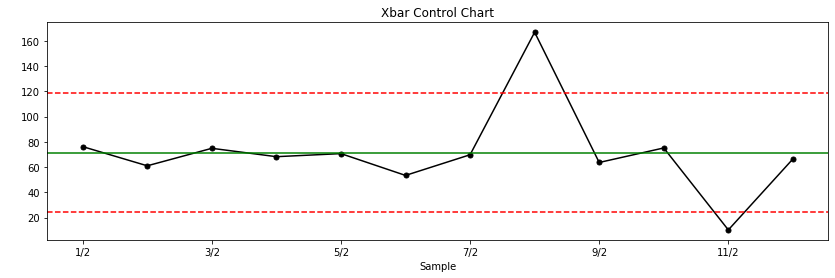

Upper control limit = 118.51
Average = 71.33
Lower control limit = 24.15


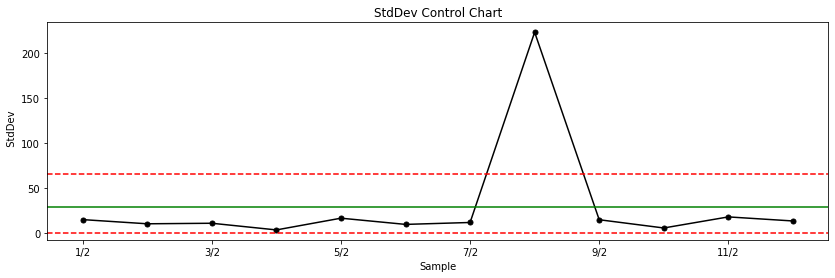

Upper control limit = 65.66
Average standard deviation = 28.98
Lower control limit = 0.0
___________________________________________
Number of out-of-control points on Xbar chart: 2
If the data are correlated, you may see an increased number of false alarms.
 
        At least 100 data points should be included in the calculations.
        

        (0.17) subgroup is out of control on the Xbar chart
        (You may see 0.7% out-of-control subgroups on the Xbar chart 
        and 0.3% out-of-control subgroups on the S chart by chance, 
        even when the process is stable)
        


In [8]:
xbar_s_control_chart(data)